In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error

In [3]:

# Función para calcular los coeficientes de regresión manualmente
def regresion_manual(X, y):
    # Agregar una columna de unos para el término independiente
    X = np.c_[np.ones((len(X),1)), X]
    
    # Calcular los coeficientes utilizando la fórmula de la pseudo inversa
    coeficientes = np.linalg.pinv(X).dot(y)

    return coeficientes 

In [4]:
# Función para predecir los valores de y
def predecir(X, coeficientes):
    Xm = np.c_[np.ones((len(X),1)), X]
    mult=Xm.dot(coeficientes)
    return  mult

In [5]:
# Calcular métricas de evaluación manualmente
def rmse(y_true, y_pred):
    error=np.array(y_true) - np.array(y_pred)
    return np.sqrt(np.mean(error ** 2))

In [6]:
def r2F(y_true, y_pred):
   # https://es.wikipedia.org/wiki/Coeficiente_de_determinaci%C3%B3n
   
    numerador = ((y_true - y_pred) ** 2).sum()
    denominador = ((y_true - y_true.mean()) ** 2).sum()
    return 1 - (numerador / denominador)

In [7]:
# Función para ajustar el modelo y evaluarlo
def ajustar_evaluar_modelo(X, y):
    coeficientes = regresion_manual(X, y)
    y_pred = predecir(X, coeficientes)
    r2_ =r2F(y, y_pred)#completar
    rmse_val = rmse(y, y_pred)#completar
    return coeficientes, y_pred, r2_, rmse_val

In [38]:
opcion=int(input())
# Cargar los datos
data = pd.read_excel('Mediciones22-02-21.xlsx')
# Definir las columnas de características (X) y la columna de objetivo (y)
if opcion==1:
    #imprimir numero de filas y numero de columnas
    print(data.shape)
    
    #seleccionar las caracteristicas(variables dependientes) y el objetivo
    caracteristicas =['VTI_F', 'PEEP', 'BPM', 'VTE_F'] #[completar]
    objetivo =['Pasos'] #
    
    print(caracteristicas)
    print(objetivo)
elif opcion==2: 
    # modelo completo solo con VTI_F, completar la funcion regresion manual
    
    X = data['VTI_F']
    y = data['Pasos']
    coef =regresion_manual(X,y)# regresion_manual(X, y)
    print(coef)
elif opcion==3: 
    # modelo completo solo con VTI_F, completar las funciones que definen las métricas
    X = data['VTI_F']
    y = data['Pasos']
    coef = regresion_manual(X, y)
    print( coef)
    y_pred = predecir(X,coef)
    r2_ = r2F(y, y_pred)
    rmse_val = rmse(y, y_pred)
    # imprimir los primeros 2 elementos de y e y_pred
    #  print(y[:3],  y_pred [COMPLETAR])
    print(y[:3],  y_pred [:3])
    # imprimir r2 y rmse
    print(r2_,  rmse_val )
elif opcion==4: 
    # modelo completo solo con VTI_F, completar la función ajustar_evaluar_modelo
    X_todo =data['VTI_F']  #data[completar]
    y =data['Pasos'] # data[completar]
    coeficientes_todo, y_pred_todo, r2_todo, rmse_todo = ajustar_evaluar_modelo(X_todo, y)
    print(r2_todo, rmse_todo)
elif opcion==5:
   # Completar la combinaciones de características de los modelos solicitados 
    models = {
        'Modelo_1': ['VTI_F'],
        'Modelo_2': ['VTI_F', 'BPM'],
        'Modelo_3': ['VTI_F','PEEP'],
        'Modelo_4': ['VTI_F','PEEP','BPM'],
        'Modelo_5': ['VTI_F','PEEP','BPM', 'VTE_F']
      #COMPLETAR EL DICCIONARIO
    }
    co1=[]
    co2=[]
    co3=[]
    for nombre_modelo, lista_caracteristicas in models.items():
        X = data[lista_caracteristicas]#data[completar]
        y = data['Pasos']
        coeficientes, y_pred, r2, rmse_val = ajustar_evaluar_modelo(X, y)
        co1.append(nombre_modelo)
        co2.append(r2)
        co3.append(rmse_val)
        print(nombre_modelo,r2, rmse_val)
    Dicc={'Modelo':co1, 'R2': co2, 'RMSE':co3}
    comparar=pd.DataFrame(Dicc)
    comparar.to_csv('Evaluacion.csv')
elif opcion==6:
    # Modelos para cada combinación de PEEP y BPM
    valores_peep_unicos = data['PEEP'].unique()#completar sugerencia, utilizar unique()
    valores_bpm_unicos = data['BPM'].unique() #completar
    print(valores_peep_unicos)
    print(valores_bpm_unicos)
    predicciones_totales = []
    for peep in valores_peep_unicos:
        for bpm in valores_bpm_unicos:
            
            
            
            datos_subset = data[(data['PEEP'] == peep) & (data['BPM'] == bpm)] #completar el filtrado de datos, se deben filtrar los datos para cada para par de PEEP y BPM
            
            
            X_subset = datos_subset[['VTI_F']]
            y_subset = datos_subset['Pasos']
            coeficientes_subset, y_pred_subset, r2_subset, rmse_subset = ajustar_evaluar_modelo(X_subset, y_subset)
            print(peep, bpm, r2_subset, rmse_subset)
            predicciones_totales.append(y_pred_subset)
    predicciones_concatenadas = np.concatenate(predicciones_totales)
    y=data['Pasos']
    r2_global = r2F(y, predicciones_concatenadas)
    rmse_global = rmse(y, predicciones_concatenadas)
    print('Global', r2_global, rmse_global)

[ 0 10]
[12 20]
0 12 0.9975786045111337 224.3313245927673
0 20 0.9970035350957476 249.55234426446884
10 12 0.9981629787974335 195.39531240805024
10 20 0.9984773587292524 177.89176935322902
Global 0.9978056192833918 213.55662330872548


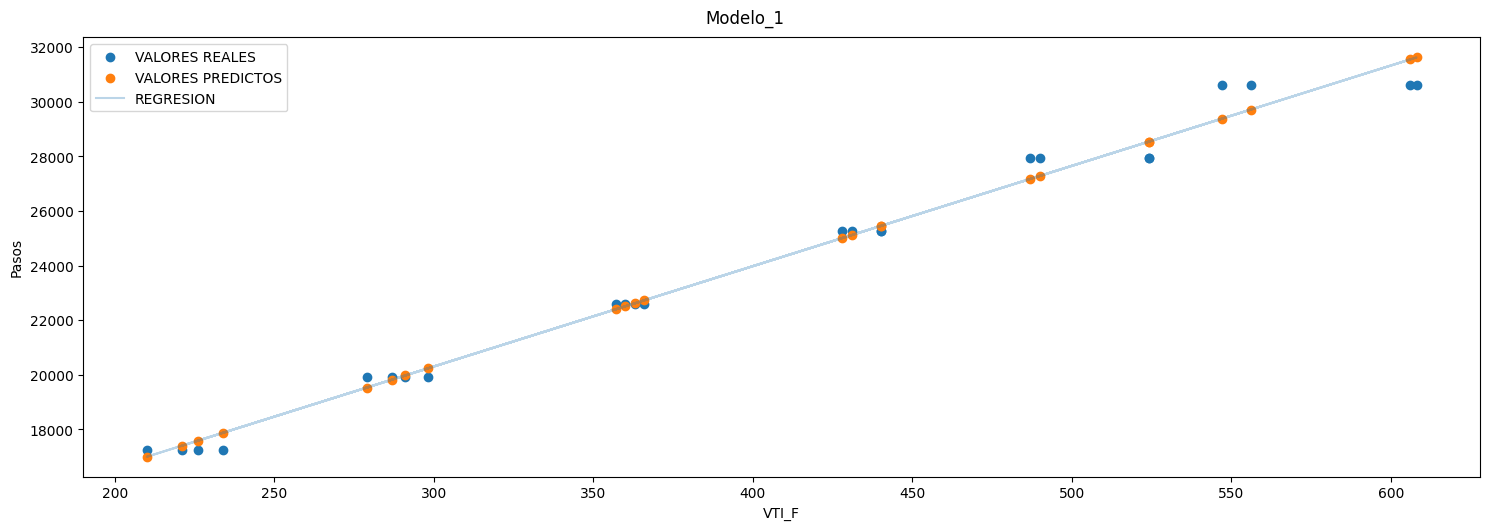

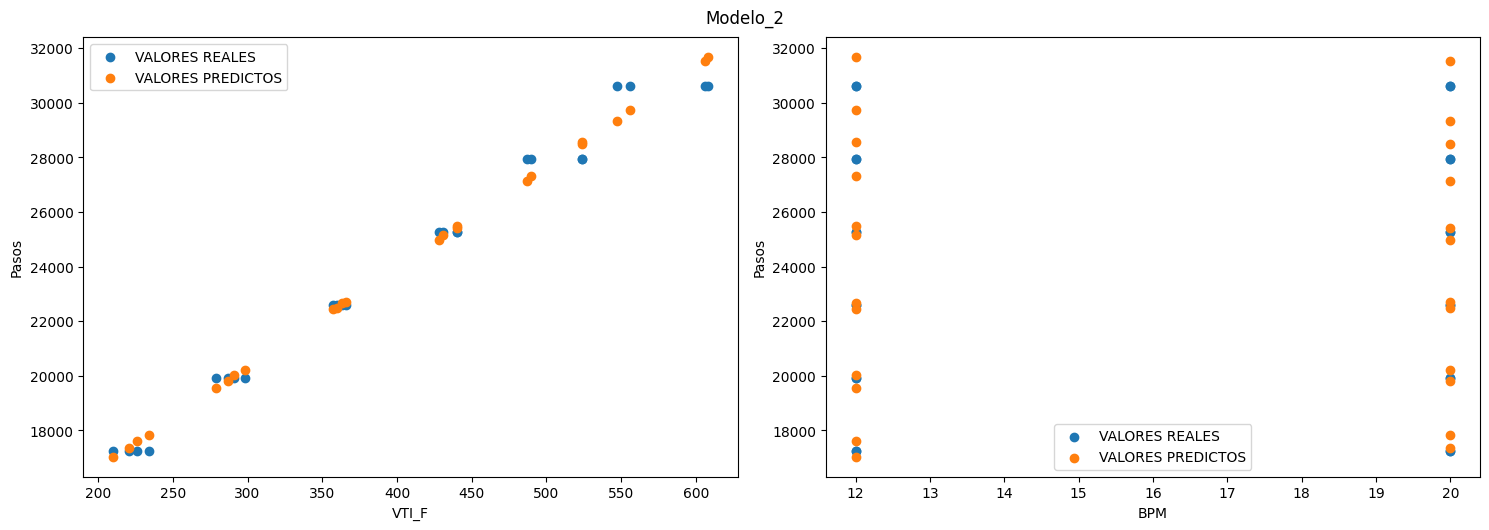

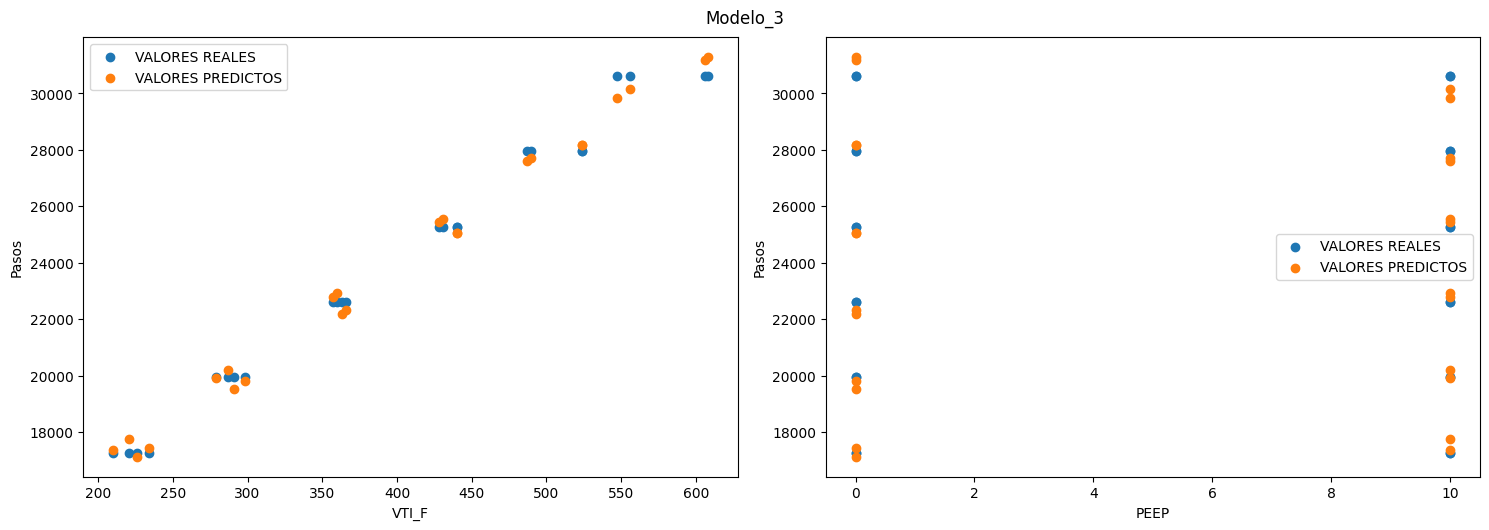

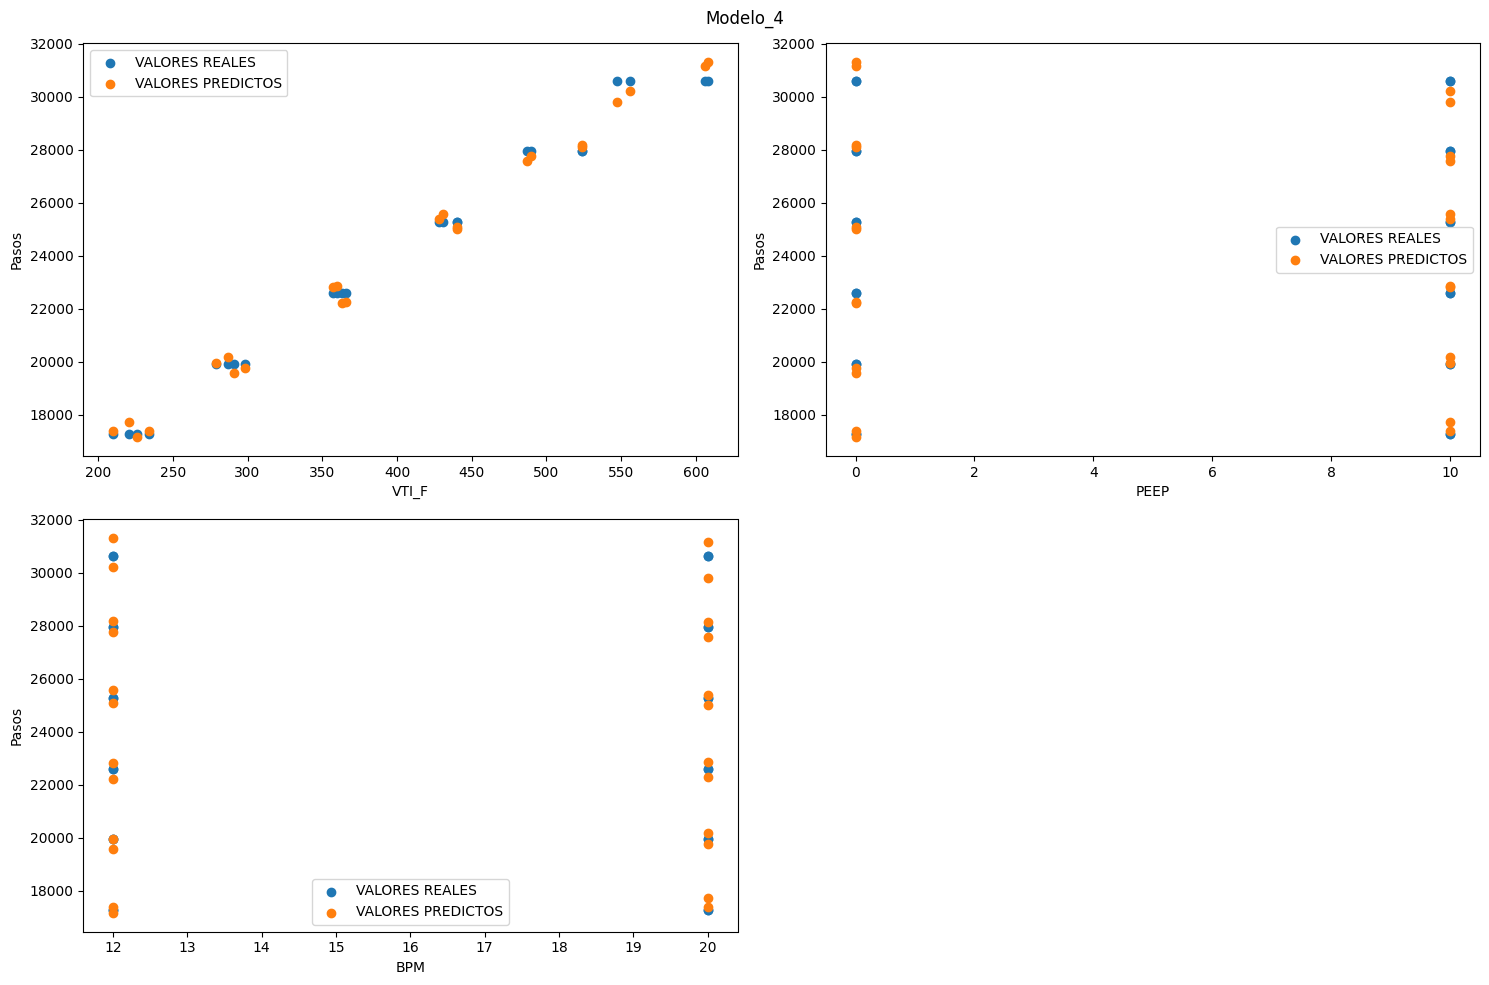

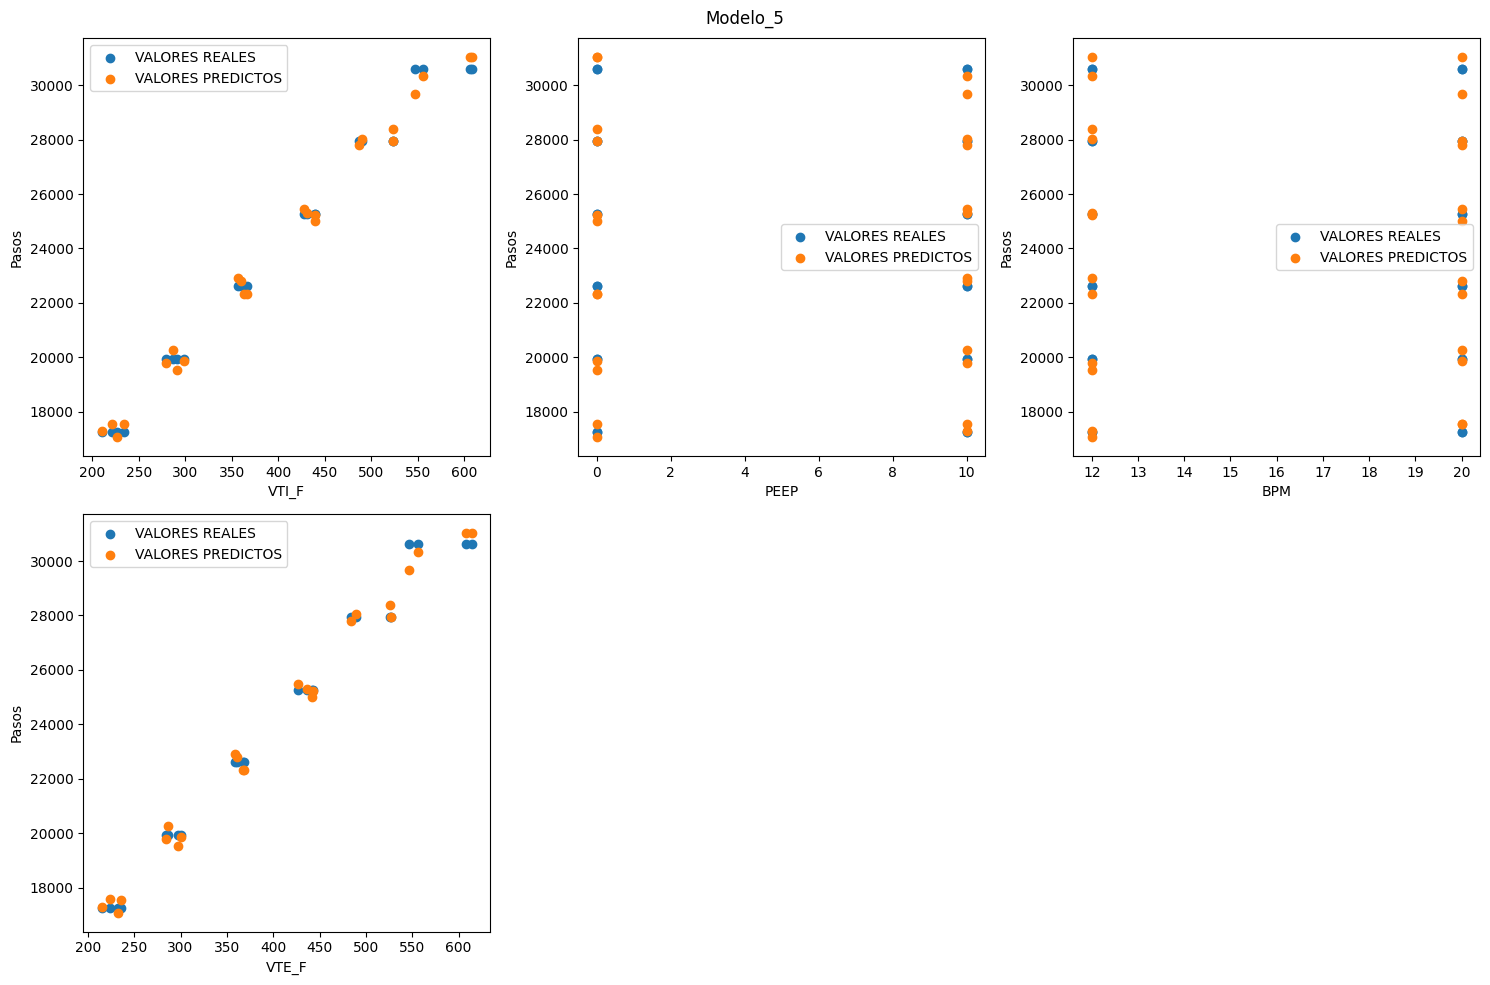

In [37]:
# GRAFICOS DE COMPROBACION
for nombre_modelo, lista_caracteristicas in models.items():
        X = data[lista_caracteristicas]#data[completar]
        y = data['Pasos']
        coeficientes, y_pred, r2, rmse_val = ajustar_evaluar_modelo(X, y)
        plt.figure(figsize=(15,10))
        plt.suptitle(nombre_modelo)
        for i, caract in enumerate(lista_caracteristicas):
            plt.subplot(2, len(lista_caracteristicas)//2+1, i+1)
            plt.scatter(X[caract], y, label='VALORES REALES')
            plt.scatter(X[caract], y_pred, label='VALORES PREDICTOS')
            if len(lista_caracteristicas)==1:
                plt.plot(X[caract], y_pred, label='REGRESION', alpha=0.3)
            plt.xlabel(caract)
            plt.ylabel('Pasos')
            plt.legend()
        plt.tight_layout()
        plt.show()

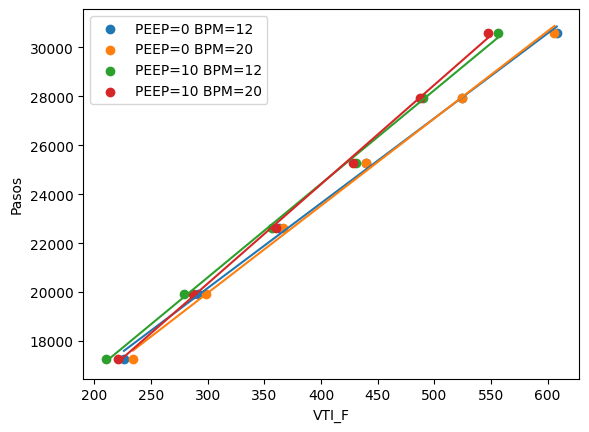

In [45]:
# Graficos de modelos para cada combinación de PEEP y BPM
valores_peep_unicos = data['PEEP'].unique()#completar sugerencia, utilizar unique()
valores_bpm_unicos = data['BPM'].unique() #completar
    
for peep in valores_peep_unicos:
    for bpm in valores_bpm_unicos:
            
            
            
            datos_subset = data[(data['PEEP'] == peep) & (data['BPM'] == bpm)] #completar el filtrado de datos, se deben filtrar los datos para cada para par de PEEP y BPM
            
            
            X_subset = datos_subset[['VTI_F']]
            y_subset = datos_subset['Pasos']
            coeficientes_subset, y_pred_subset, r2_subset, rmse_subset = ajustar_evaluar_modelo(X_subset, y_subset)
            plt.scatter(X_subset,y_subset,label=f'PEEP={peep} BPM={bpm}')
            plt.plot(X_subset,y_pred_subset)
            
plt.xlabel('VTI_F')
plt.ylabel('Pasos')
plt.legend()
plt.show()